In [10]:
import sys
sys.path.append("..")

import os
project_root = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))

import pandas as pd
from training import TrainingManager, TrainingConfig
from envs.trading_env import MyTradingEnv

N_EPISODES_END=15_000

N_EPISODES_START=10_000

MAX_STEPS=1_000
LEARNING_RATE=0.05
DISCOUNT_FACTOR=0.9
EPSILON_START=1.0
EPSILON_END=0.05
EPSILON_DECAY=0.9995
EVAL_FREQUANCY=200
SAVE_FREQUANCY=1_000

TRAIN_VERSION="v1"

data_path = "../data/data_1h_2021.csv"
df1 = pd.read_csv(data_path, index_col=0, parse_dates=True, date_format="iso8601")
data_path = "../data/data_1h_2022.csv"
df2 = pd.read_csv(data_path, index_col=0, parse_dates=True, date_format="iso8601")
data_path = "../data/data_1h_2023.csv"
df3 = pd.read_csv(data_path, index_col=0, parse_dates=True, date_format="iso8601")

df = pd.concat([df1])

INITIAL_BALANCE = 1000.0
WINDOW_SIZE = 10
COMMISSION = 0.0001
SLIPPAGE = 0.0005
MAX_HOLDING_TIME = 60 * 24
HOLDING_THRESHOLD = 24
MAX_DRAWDOWN_THRESHOLD = 0.05
LAMBDA_DRAWDOWN = 0.1
LAMBDA_HOLD = 0.01
REWARD_SCALING=10.0

In [11]:
env_params = {
    "initial_balance": INITIAL_BALANCE,
    "window_size": WINDOW_SIZE,
    "commission": COMMISSION,
    "slippage": SLIPPAGE,
    "max_holding_time": MAX_HOLDING_TIME,
    "lambda_drawdown": LAMBDA_DRAWDOWN,
    "lambda_hold": LAMBDA_HOLD,
    "reward_scaling": REWARD_SCALING,
    "max_steps": MAX_STEPS,
}

continue_train_params = {
    "n_episodes": N_EPISODES_END,
    "n_episodes_start": N_EPISODES_START,
    "max_steps": MAX_STEPS,
    "learning_rate": LEARNING_RATE,
    "discount_factor": DISCOUNT_FACTOR,
    "epsilon_start": EPSILON_START,
    "epsilon_end": EPSILON_END,
    "epsilon_decay": EPSILON_DECAY,
    "eval_frequency": EVAL_FREQUANCY,
    "save_frequency": SAVE_FREQUANCY,
}

In [12]:
def run_continue_training(
    agent_type: str,
    df,
    project_root: str,
    env_params: dict,
    train_params: dict,
    train_version: str,
):
    if agent_type == "SARSA":
        from agents.classical.sarsa_agent import SarsaAgent

        agent = SarsaAgent()

    elif agent_type == "SARSA_Lambda":
        from agents.classical.sarsa_lambda_agent import SarsaLambdaAgent

        agent = SarsaLambdaAgent()

    elif agent_type == "QLearning":
        from agents.classical.qlearning_agent import QLearningAgent

        agent = QLearningAgent()

    elif agent_type == "Monte_Carlo":
        from agents.classical.monte_carlo_agent import MonteCarloAgent

        agent = MonteCarloAgent()

    else:
        raise ValueError(f"Unknown agent type: {agent_type}")

    checkpoint_path = os.path.join(
        project_root,
        "training_data",
        "checkpoints",
        f"exp_{agent_type.lower()}_{train_version}",
        "final_agent.pkl",
    )

    if not os.path.exists(checkpoint_path):
        raise FileNotFoundError(f"Checkpoint not found: {checkpoint_path}")

    env = MyTradingEnv(df=df, **env_params)

    continue_config = TrainingConfig(
        agent_name=f"{agent_type}_{train_version}_continue",
        agent_type=agent_type,
        **train_params,
    )

    manager = TrainingManager(
        base_log_dir=os.path.join(project_root, "training_data/logs"),
        base_checkpoint_dir=os.path.join(project_root, "training_data/checkpoints"),
    )

    experiment_name = f"exp_{agent_type.lower()}_{train_version}_continue"

    return manager.continue_training(
        agent=agent,
        env=env,
        config=continue_config,
        checkpoint_path=checkpoint_path,
        experiment_name=experiment_name,
    )

### Дообучение QLearningAgent

In [13]:
results_qlearning = run_continue_training(
    agent_type="QLearning",
    df=df,
    project_root=project_root,
    env_params=env_params,
    train_params=continue_train_params,
    train_version=TRAIN_VERSION
)


Загрузка агента из /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_qlearning_v1/final_agent.pkl
Агент загружен: /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_qlearning_v1/final_agent.pkl
Эксперимент: exp_qlearning_v1_continue
Эпизодов: 15000

[Continue] Эпизод 10200/15000 | Reward=-1.18 | Eps=0.010
[Continue] Эпизод 10400/15000 | Reward=-2.36 | Eps=0.010
[Continue] Эпизод 10600/15000 | Reward=-2.75 | Eps=0.010
[Continue] Эпизод 10800/15000 | Reward=-7.93 | Eps=0.010
[Continue] Эпизод 11000/15000 | Reward=-1.15 | Eps=0.010
Агент сохранён: /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_qlearning_v1_continue/continue_ep11000.pkl
[Continue] Эпизод 11200/15000 | Reward=3.43 | Eps=0.010
[Continue] Эпизод 11400/15000 | Reward=-5.11 | Eps=0.010
[Continue] Эпизод 11600/15000 | Reward=-3.10 | Eps=0.010
[Continue] Эпизод 11800/15000 | Reward=17.27 | Eps=0.010
[Continue] Эпизод 12000/15000 | Reward=-4.83 | Eps=0.010
Агент 

### Дообучение MonteCarloAgent

In [14]:
# continue_train_params["max_steps"] = MAX_STEPS // 2

results_montecarlo = run_continue_training(
    agent_type="Monte_Carlo",
    df=df,
    project_root=project_root,
    env_params=env_params,
    train_params=continue_train_params,
    train_version=TRAIN_VERSION
)
# continue_train_params["max_steps"] = MAX_STEPS


Загрузка агента из /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_monte_carlo_v1/final_agent.pkl
Monte Carlo агент загружен: /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_monte_carlo_v1/final_agent.pkl
  Эпизодов: 10000
  Размер Q-таблицы: 54
  First-visit: True, sample-average: False
Эксперимент: exp_monte_carlo_v1_continue
Эпизодов: 15000

[Continue] Эпизод 10200/15000 | Reward=1.11 | Eps=0.010
[Continue] Эпизод 10400/15000 | Reward=-5.16 | Eps=0.010
[Continue] Эпизод 10600/15000 | Reward=28.39 | Eps=0.010
[Continue] Эпизод 10800/15000 | Reward=-32.05 | Eps=0.010
[Continue] Эпизод 11000/15000 | Reward=24.02 | Eps=0.010
Monte Carlo агент сохранён: /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_monte_carlo_v1_continue/continue_ep11000.pkl
[Continue] Эпизод 11200/15000 | Reward=-49.26 | Eps=0.010
[Continue] Эпизод 11400/15000 | Reward=38.43 | Eps=0.010
[Continue] Эпизод 11600/15000 | Reward=-22.78 | Eps=0.010
[

### Дообучение SARSAAgent

In [15]:
results_sarsa = run_continue_training(
    agent_type="SARSA",
    df=df,
    project_root=project_root,
    env_params=env_params,
    train_params=continue_train_params,
    train_version=TRAIN_VERSION
)


Загрузка агента из /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_sarsa_v1/final_agent.pkl
SARSA(λ) агент загружен: /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_sarsa_v1/final_agent.pkl
Эксперимент: exp_sarsa_v1_continue
Эпизодов: 15000

[Continue] Эпизод 10200/15000 | Reward=3.11 | Eps=0.010
[Continue] Эпизод 10400/15000 | Reward=-7.86 | Eps=0.010
[Continue] Эпизод 10600/15000 | Reward=0.84 | Eps=0.010
[Continue] Эпизод 10800/15000 | Reward=-1.06 | Eps=0.010
[Continue] Эпизод 11000/15000 | Reward=7.90 | Eps=0.010
SARSA(λ) агент сохранён: /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_sarsa_v1_continue/continue_ep11000.pkl
[Continue] Эпизод 11200/15000 | Reward=-9.30 | Eps=0.010
[Continue] Эпизод 11400/15000 | Reward=-2.36 | Eps=0.010
[Continue] Эпизод 11600/15000 | Reward=-2.08 | Eps=0.010
[Continue] Эпизод 11800/15000 | Reward=-3.07 | Eps=0.010
[Continue] Эпизод 12000/15000 | Reward=-5.21 | Eps=0.010
SARSA(

### Дообучение SARSALambdaAgent

In [16]:
continue_train_params_lambda = {
    **continue_train_params,
    "lambda_param": 0.8,
}

results_sarsalambda = run_continue_training(
    agent_type="SARSA_Lambda",
    df=df,
    project_root=project_root,
    env_params=env_params,
    train_params=continue_train_params_lambda,
    train_version=TRAIN_VERSION
)


Загрузка агента из /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_sarsa_lambda_v1/final_agent.pkl
SARSA(λ) агент загружен: /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_sarsa_lambda_v1/final_agent.pkl
Эксперимент: exp_sarsa_lambda_v1_continue
Эпизодов: 15000

[Continue] Эпизод 10200/15000 | Reward=52.69 | Eps=0.010
[Continue] Эпизод 10400/15000 | Reward=54.56 | Eps=0.010
[Continue] Эпизод 10600/15000 | Reward=-5.61 | Eps=0.010
[Continue] Эпизод 10800/15000 | Reward=23.83 | Eps=0.010
[Continue] Эпизод 11000/15000 | Reward=8.62 | Eps=0.010
SARSA(λ) агент сохранён: /mnt/d/Study/python/TradingAgentClassicRL/training_data/checkpoints/exp_sarsa_lambda_v1_continue/continue_ep11000.pkl
[Continue] Эпизод 11200/15000 | Reward=-3.40 | Eps=0.010
[Continue] Эпизод 11400/15000 | Reward=-0.20 | Eps=0.010
[Continue] Эпизод 11600/15000 | Reward=-10.72 | Eps=0.010
[Continue] Эпизод 11800/15000 | Reward=1.45 | Eps=0.010
[Continue] Эпизод 12000/15000 | R

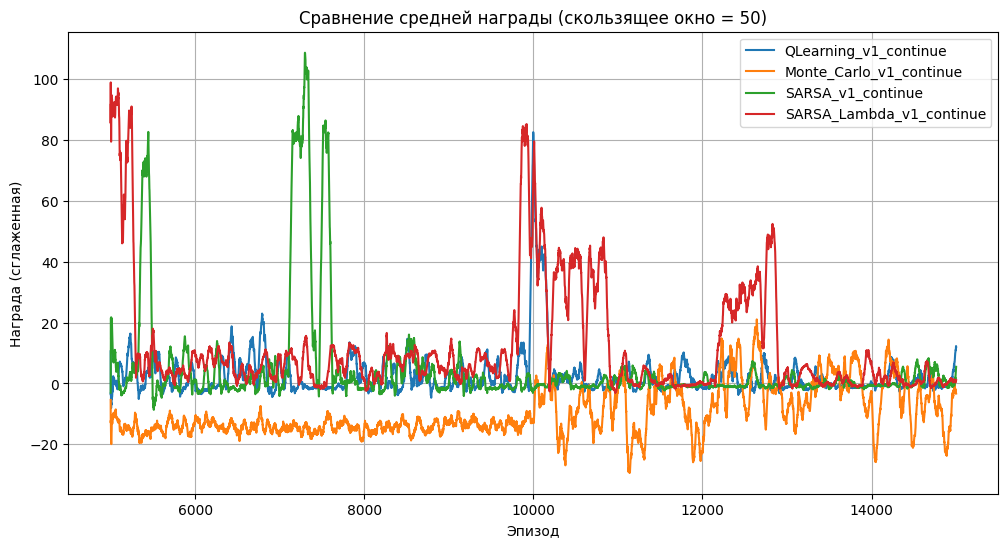

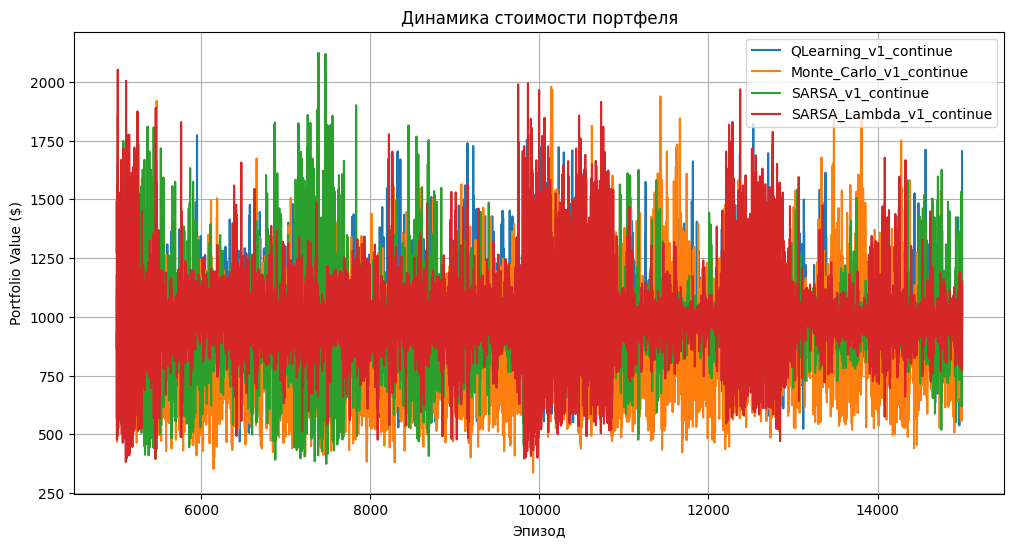

,agent,reward,portfolio_value,win_rate,n_trades,max_drawdown
9999,QLearning_v1_continue,1.90,690.10,34.62,26,0.08
19999,Monte_Carlo_v1_continue,17.94,1098.44,47.33,150,0.06
29999,SARSA_v1_continue,-0.46,976.78,41.67,12,0.06
39999,SARSA_Lambda_v1_continue,15.34,1149.56,80.00,5,0.01


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

experiment_dirs = [
    f"../training_data/logs/exp_qlearning_{TRAIN_VERSION}_continue",
    f"../training_data/logs/exp_monte_carlo_{TRAIN_VERSION}_continue",
    f"../training_data/logs/exp_sarsa_{TRAIN_VERSION}_continue",
    f"../training_data/logs/exp_sarsa_lambda_{TRAIN_VERSION}_continue",
]

all_data = []
for exp_dir in experiment_dirs:
    exp_dir = Path(exp_dir)
    episodes_df = pd.read_csv(exp_dir / "episodes.csv")
    with open(exp_dir / "training_summary.json") as f:
        summary = json.load(f)
    agent_name = summary["config"]["agent_name"]
    episodes_df["agent"] = agent_name
    all_data.append(episodes_df)


df = pd.concat(all_data, ignore_index=True)

plt.figure(figsize=(12, 6))
for agent in df["agent"].unique():
    agent_data = df[df["agent"] == agent]
    smoothed = agent_data["reward"].rolling(window=50, min_periods=1).mean()
    plt.plot(agent_data["episode"], smoothed, label=agent)

plt.title("Сравнение средней награды (скользящее окно = 50)")
plt.xlabel("Эпизод")
plt.ylabel("Награда (сглаженная)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
for agent in df["agent"].unique():
    agent_data = df[df["agent"] == agent]
    plt.plot(agent_data["episode"], agent_data["portfolio_value"], label=agent)

plt.title("Динамика стоимости портфеля")
plt.xlabel("Эпизод")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid(True)
plt.show()


final_metrics = df.groupby("agent").tail(1)[
    ["agent", "reward", "portfolio_value", "win_rate", "n_trades", "max_drawdown"]
]
display(final_metrics.round(2))